Team Members:
1. Himanshi Bajaj (225827)
2. Sanjeeth Busnur Indushekar (224133)
3. Suraj ()

# Task 1 Optimizers

In [14]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras import datasets,layers, models
from keras import regularizers,optimizers
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir("/content/drive/My Drive/Colab Notebooks/IDL course OvGU")

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad,SGD
from tensorflow.keras.regularizers import l2

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

## VGG Net

In [ ]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# print(train_labels.shape,test_labels.shape)


train_images = train_images.astype(np.float32) / 255.0
train_labels = train_labels.astype(np.int32)


test_images = test_images.astype(np.float32) / 255.0
test_labels = test_labels.astype(np.int32)

In [ ]:
# VGG-16 

vgg_model = tf.keras.Sequential([ tf.keras.layers.Conv2D(filters= 64, kernel_size= 3 , input_shape=(32,32,3),padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.3),
                             
                              tf.keras.layers.Conv2D(filters= 64, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 256 , kernel_size= 3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512 , kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                              tf.keras.layers.Dropout(0.5),
                             
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(512, activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.5),
                              
                              tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
# vgg_model.summary()

### SGD optimizer

In [ ]:
learning_rate = 0.1
lr_decay = 1e-6
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9)
vgg_model.compile(optimizer=sgd, loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 2.5443 - accuracy: 0.1647 - val_loss: 3.4056 - val_accuracy: 0.1288
Epoch 2/10
1563/1563 [==============================] - 52s 34ms/step - loss: 2.0139 - accuracy: 0.2224 - val_loss: 3.2882 - val_accuracy: 0.1157
Epoch 3/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.8998 - accuracy: 0.2772 - val_loss: 3.0570 - val_accuracy: 0.1666
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.8304 - accuracy: 0.3101 - val_loss: 2.1527 - val_accuracy: 0.2441
Epoch 5/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.7444 - accuracy: 0.3500 - val_loss: 2.4919 - val_accuracy: 0.2401
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6721 - accuracy: 0.3824 - val_loss: 3.7997 - val_accuracy: 0.3143
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.5763 - accuracy: 0.4236 - val_loss: 3.2874 -

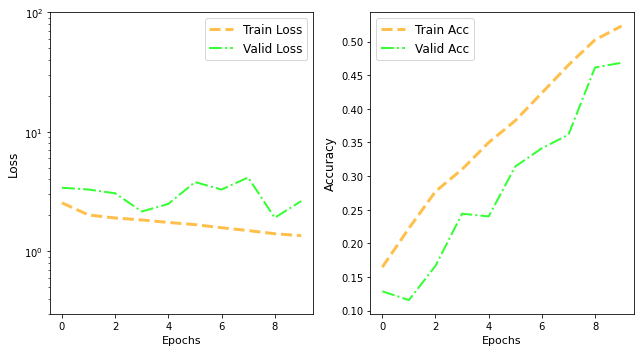

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_sgd_vgg.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = vgg_model.evaluate(test_images, test_labels, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  2.633685827255249
VGG accuracy:  0.4684999883174896


### ADAM optimizer

In [ ]:
learning_rate = 0.005
adam = optimizers.Adam(lr=learning_rate)
vgg_model.compile(optimizer=adam, loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 2.1522 - accuracy: 0.2365 - val_loss: 1.7898 - val_accuracy: 0.3129
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5817 - accuracy: 0.4143 - val_loss: 5.2816 - val_accuracy: 0.1036
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3481 - accuracy: 0.5146 - val_loss: 1.6396 - val_accuracy: 0.4616
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1179 - accuracy: 0.6175 - val_loss: 1.2786 - val_accuracy: 0.6219
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9969 - accuracy: 0.6634 - val_loss: 0.9054 - val_accuracy: 0.6996
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8963 - accuracy: 0.7045 - val_loss: 1.0376 - val_accuracy: 0.6658
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8275 - accuracy: 0.7341 - val_loss: 0.7599 -

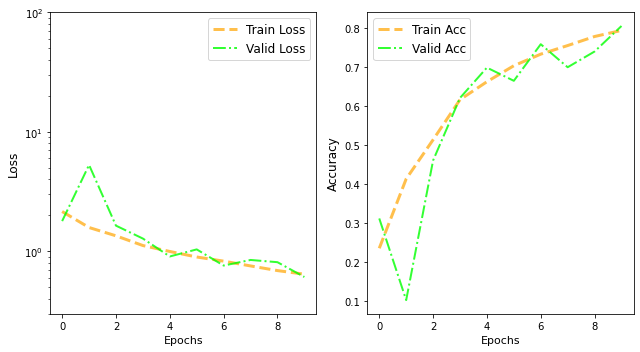

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_adam_vgg.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = vgg_model.evaluate(test_images, test_labels, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  0.6097181439399719
VGG accuracy:  0.8062999844551086


### Adagrad optimizer

In [ ]:
learning_rate = 0.005
ada = optimizers.Adagrad(lr=learning_rate)
vgg_model.compile(optimizer=ada, loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 2.2665 - accuracy: 0.2582 - val_loss: 2.0322 - val_accuracy: 0.3183
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.7165 - accuracy: 0.3938 - val_loss: 1.9255 - val_accuracy: 0.4224
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4692 - accuracy: 0.4797 - val_loss: 1.7698 - val_accuracy: 0.4658
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3043 - accuracy: 0.5365 - val_loss: 1.4525 - val_accuracy: 0.5423
Epoch 5/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1863 - accuracy: 0.5825 - val_loss: 1.3243 - val_accuracy: 0.5777
Epoch 6/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0919 - accuracy: 0.6160 - val_loss: 1.2428 - val_accuracy: 0.5994
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0132 - accuracy: 0.6452 - val_loss: 1.0798 -

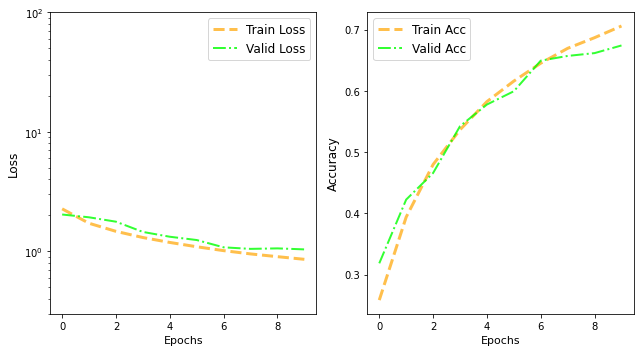

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_ada_vgg.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = vgg_model.evaluate(test_images, test_labels, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  1.0377427339553833
VGG accuracy:  0.6741999983787537


### RMSprop optimizer

In [ ]:
learning_rate = 0.005
rmsprop = optimizers.RMSprop(lr=learning_rate)
vgg_model.compile(optimizer=rmsprop, loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.3521 - accuracy: 0.1816 - val_loss: 2.2497 - val_accuracy: 0.2189
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.8003 - accuracy: 0.3167 - val_loss: 1.5981 - val_accuracy: 0.4041
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4790 - accuracy: 0.4616 - val_loss: 1.3675 - val_accuracy: 0.5121
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2094 - accuracy: 0.5795 - val_loss: 1.1894 - val_accuracy: 0.6086
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0460 - accuracy: 0.6441 - val_loss: 0.9459 - val_accuracy: 0.6679
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9297 - accuracy: 0.6872 - val_loss: 1.0003 - val_accuracy: 0.6844
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8488 - accuracy: 0.7192 - val_loss: 1.0544 -

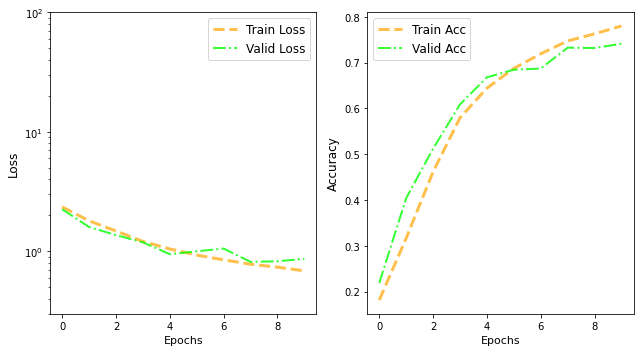

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_rmsprop_vgg.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = vgg_model.evaluate(test_images, test_labels, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  0.8642755746841431
VGG accuracy:  0.741100013256073


## ResNet

In [190]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# print(train_labels.shape,test_labels.shape)


train_images = train_images.astype(np.float32) / 255.0
train_labels = train_labels.astype(np.int32)


test_images = test_images.astype(np.float32) / 255.0
test_labels = test_labels.astype(np.int32)

In [191]:
### One hot encoding for labels 

train_lab_categorical = tf.keras.utils.to_categorical(
    train_labels, num_classes=10, dtype='uint8')

test_lab_categorical = tf.keras.utils.to_categorical(
    test_labels, num_classes=10, dtype='uint8')

In [192]:
# Train -test split 

from sklearn.model_selection import train_test_split 
train_img, valid_img, train_label, valid_label = train_test_split(train_images, train_lab_categorical, test_size=0.20, 
                                                            stratify=train_lab_categorical,random_state=40,shuffle = True)

print ("train data shape after the split: ", train_img.shape)
print ('validation data shape: ', valid_img.shape)
print ("validation labels shape: ", valid_label.shape)

train data shape after the split:  (40000, 32, 32, 3)
validation data shape:  (10000, 32, 32, 3)
validation labels shape:  (10000, 10)


In [193]:
#  Including Data Augmentation 
batch_size = 64 

train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2, 
                                                                width_shift_range=0.1, 
                                                                height_shift_range = 0.1, 
                                                                horizontal_flip=True)
 
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_set_conv = train_DataGen.flow(train_img, train_label, batch_size=batch_size) 
valid_set_conv = valid_datagen.flow(valid_img, valid_label, batch_size=batch_size) 

In [194]:
# Reference from https://github.com/suvoooo/Learn-TensorFlow/blob/master/resnet/Implement_Resnet_TensorFlow.ipynb

# ResNet-50

def resnet_identity(x, filters): 

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x


In [195]:
def resnet_conv(x, s, filters):
  '''
  here the input size changes, when it goes via conv blocks
  so the skip connection uses a projection (conv layer) matrix
  ''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x) 
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [196]:
def resnet50():

  input_img = Input(shape=(train_img.shape[1], train_img.shape[2], train_img.shape[3])) # cifar 10 images size
  x = ZeroPadding2D(padding=(3, 3))(input_img)

  # 1st stage
  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  x = resnet_conv(x, s=1, filters=(64, 256))
  x = resnet_identity(x, filters=(64, 256))
  x = resnet_identity(x, filters=(64, 256))

  # 3rd stage

  x = resnet_conv(x, s=2, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))

  # 4th stage

  x = resnet_conv(x, s=2, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))

  # 5th stage

  x = resnet_conv(x, s=2, filters=(512, 2048))
  x = resnet_identity(x, filters=(512, 2048))
  x = resnet_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(10, activation='softmax', kernel_initializer='he_normal')(x)

  # define the model 

  model = Model(inputs=input_img, outputs=x, name='Resnet50')

  return model

In [197]:
resnet50_model = resnet50()
# resnet50_model.summary()

### SGD optimizer

In [174]:
learning_rate = 0.1
lr_decay = 1e-6
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9)
resnet50_model.compile(optimizer=sgd, loss= 'categorical_crossentropy',metrics = ['accuracy'])

history = resnet50_model.fit(train_set_conv, epochs=120, steps_per_epoch=train_img.shape[0]/batch_size, 
                                  validation_steps=valid_img.shape[0]/batch_size, validation_data=valid_set_conv)

Epoch 1/120
625/625 [==============================] - 35s 57ms/step - loss: 219.3990 - accuracy: 0.1903 - val_loss: 52.2915 - val_accuracy: 0.1206
Epoch 2/120
625/625 [==============================] - 34s 54ms/step - loss: 23.0207 - accuracy: 0.2152 - val_loss: 8.9319 - val_accuracy: 0.1455
Epoch 3/120
625/625 [==============================] - 33s 54ms/step - loss: 8.2706 - accuracy: 0.2206 - val_loss: 11.8588 - val_accuracy: 0.2124
Epoch 4/120
625/625 [==============================] - 33s 53ms/step - loss: 5.6581 - accuracy: 0.2412 - val_loss: 3.5030 - val_accuracy: 0.1580
Epoch 5/120
625/625 [==============================] - 33s 53ms/step - loss: 4.7126 - accuracy: 0.2403 - val_loss: 844724864.0000 - val_accuracy: 0.1000
Epoch 6/120
625/625 [==============================] - 34s 54ms/step - loss: 6.8219 - accuracy: 0.2158 - val_loss: 3.7082 - val_accuracy: 0.1075
Epoch 7/120
625/625 [==============================] - 33s 53ms/step - loss: 3.6852 - accuracy: 0.2259 - val_loss: 4.

In [175]:
resnet50_model.save('resnet50_model.h5')

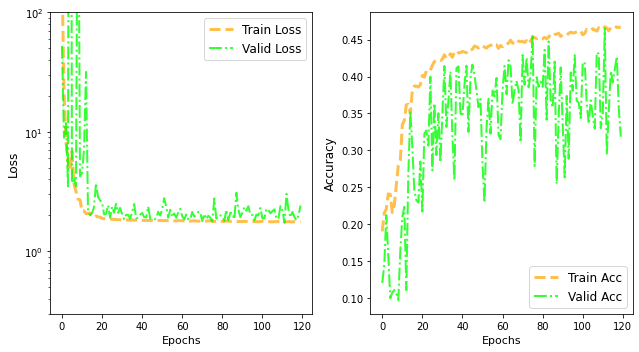

In [176]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_sgd_res.png', dpi=250)
plt.show()

In [177]:
# Checking the performance on the test data 
test_result = resnet50_model.evaluate(test_images, test_lab_categorical, verbose=0)

print ("ResNet50 loss: ", test_result[0])
print ("ResNet50 accuracy: ", test_result[1])

ResNet50 loss:  2.4215316772460938
ResNet50 accuracy:  0.31610000133514404


### ADAM optimizer

In [ ]:
learning_rate = 0.003
adam = optimizers.Adam(lr=learning_rate)
resnet50_model.compile(optimizer=adam, loss= 'categorical_crossentropy',metrics = ['accuracy'])

history = resnet50_model.fit(train_set_conv, epochs=160, steps_per_epoch=train_img.shape[0]/batch_size, 
                                  validation_steps=valid_img.shape[0]/batch_size, validation_data=valid_set_conv)

Epoch 1/160
625/625 [==============================] - 31s 50ms/step - loss: 13.0462 - accuracy: 0.2527 - val_loss: 725.0502 - val_accuracy: 0.1134
Epoch 2/160
625/625 [==============================] - 30s 47ms/step - loss: 6.8643 - accuracy: 0.2462 - val_loss: 5.3137 - val_accuracy: 0.2034
Epoch 3/160
625/625 [==============================] - 30s 48ms/step - loss: 5.7777 - accuracy: 0.2398 - val_loss: 6.6617 - val_accuracy: 0.1352
Epoch 4/160
625/625 [==============================] - 30s 48ms/step - loss: 4.9952 - accuracy: 0.2266 - val_loss: 3.7682 - val_accuracy: 0.2147
Epoch 5/160
625/625 [==============================] - 30s 47ms/step - loss: 4.2057 - accuracy: 0.2591 - val_loss: 3.2736 - val_accuracy: 0.2006
Epoch 6/160
625/625 [==============================] - 30s 48ms/step - loss: 3.4763 - accuracy: 0.2819 - val_loss: 2.8184 - val_accuracy: 0.2658
Epoch 7/160
625/625 [==============================] - 30s 47ms/step - loss: 2.6360 - accuracy: 0.3233 - val_loss: 2.1854 - val

In [ ]:
resnet50_model.save('resnet50_model_adam.h5')

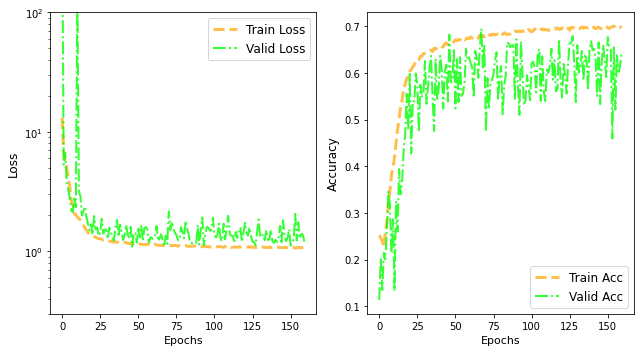

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_adam_res.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = resnet50_model.evaluate(test_images, test_lab_categorical, verbose=0)

print ("ResNet50 loss: ", test_result[0])
print ("ResNet50 accuracy: ", test_result[1])

ResNet50 loss:  1.229108214378357
ResNet50 accuracy:  0.632099986076355


### Adagrad optimizer

In [186]:
learning_rate = 0.005
ada = optimizers.Adagrad(lr=learning_rate)
resnet50_model.compile(optimizer=ada, loss= 'categorical_crossentropy',metrics = ['accuracy'])

history = resnet50_model.fit(train_set_conv, epochs=120, steps_per_epoch=train_img.shape[0]/batch_size, 
                                  validation_steps=valid_img.shape[0]/batch_size, validation_data=valid_set_conv)

Epoch 1/120
625/625 [==============================] - 34s 55ms/step - loss: 19.8474 - accuracy: 0.3265 - val_loss: 19.1292 - val_accuracy: 0.4141
Epoch 2/120
625/625 [==============================] - 32s 52ms/step - loss: 18.8221 - accuracy: 0.4228 - val_loss: 18.4517 - val_accuracy: 0.4494
Epoch 3/120
625/625 [==============================] - 33s 52ms/step - loss: 18.1304 - accuracy: 0.4586 - val_loss: 17.7385 - val_accuracy: 0.4999
Epoch 4/120
625/625 [==============================] - 33s 52ms/step - loss: 17.4992 - accuracy: 0.4903 - val_loss: 17.1560 - val_accuracy: 0.5152
Epoch 5/120
625/625 [==============================] - 33s 52ms/step - loss: 16.8941 - accuracy: 0.5171 - val_loss: 16.6433 - val_accuracy: 0.5271
Epoch 6/120
625/625 [==============================] - 33s 53ms/step - loss: 16.3343 - accuracy: 0.5333 - val_loss: 16.0022 - val_accuracy: 0.5650
Epoch 7/120
625/625 [==============================] - 33s 53ms/step - loss: 15.7891 - accuracy: 0.5488 - val_loss: 15

In [187]:
resnet50_model.save('resnet50_model_ada.h5')

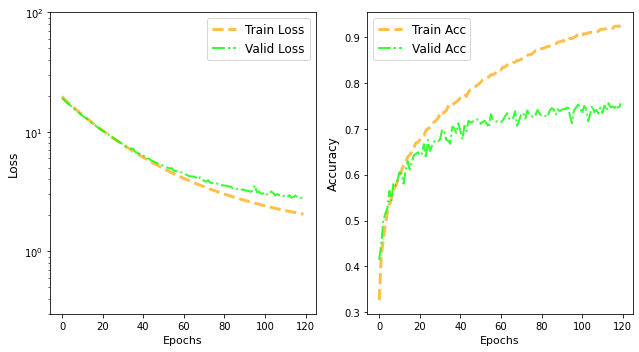

In [188]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_ada_res.png', dpi=250)
plt.show()

In [189]:
# Checking the performance on the test data 
test_result = resnet50_model.evaluate(test_images, test_lab_categorical, verbose=0)

print ("ResNet50 loss: ", test_result[0])
print ("ResNet50 accuracy: ", test_result[1])

ResNet50 loss:  2.8227338790893555
ResNet50 accuracy:  0.7444000244140625


### RMSprop optimizer

In [198]:
learning_rate = 0.005
rmsprop = optimizers.RMSprop(lr=learning_rate)
resnet50_model.compile(optimizer=rmsprop, loss= 'categorical_crossentropy',metrics = ['accuracy'])

history = resnet50_model.fit(train_set_conv, epochs=120, steps_per_epoch=train_img.shape[0]/batch_size, 
                                  validation_steps=valid_img.shape[0]/batch_size, validation_data=valid_set_conv)

Epoch 1/120
625/625 [==============================] - 42s 68ms/step - loss: 10.8492 - accuracy: 0.1187 - val_loss: 17.1677 - val_accuracy: 0.1041
Epoch 2/120
625/625 [==============================] - 41s 65ms/step - loss: 6.6622 - accuracy: 0.1330 - val_loss: 5.0929 - val_accuracy: 0.1006
Epoch 3/120
625/625 [==============================] - 40s 65ms/step - loss: 5.0805 - accuracy: 0.1255 - val_loss: 10.5414 - val_accuracy: 0.1000
Epoch 4/120
625/625 [==============================] - 40s 65ms/step - loss: 3.7514 - accuracy: 0.1413 - val_loss: 2.9757 - val_accuracy: 0.1218
Epoch 5/120
625/625 [==============================] - 40s 65ms/step - loss: 3.1814 - accuracy: 0.1726 - val_loss: 7.5131 - val_accuracy: 0.1000
Epoch 6/120
625/625 [==============================] - 41s 65ms/step - loss: 2.7278 - accuracy: 0.2097 - val_loss: 2.5186 - val_accuracy: 0.2047
Epoch 7/120
625/625 [==============================] - 40s 65ms/step - loss: 2.4218 - accuracy: 0.2812 - val_loss: 2.9013 - val

In [199]:
resnet50_model.save('resnet50_model_rmsprop.h5')

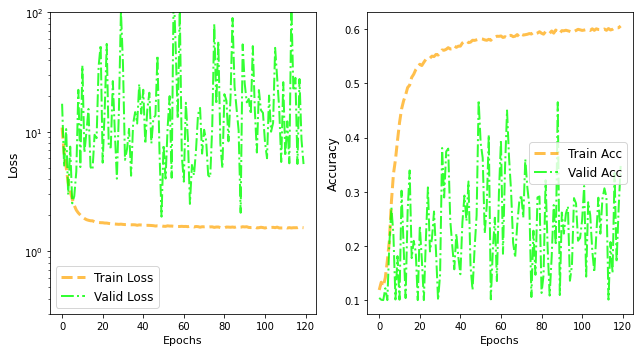

In [200]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/accuracy_rmsprop_res.png', dpi=250)
plt.show()

In [201]:
# Checking the performance on the test data 
test_result = resnet50_model.evaluate(test_images, test_lab_categorical, verbose=0)

print ("ResNet50 loss: ", test_result[0])
print ("ResNet50 accuracy: ", test_result[1])

ResNet50 loss:  5.36508846282959
ResNet50 accuracy:  0.3440999984741211


# Task 2 Regularization


## Without regularization - VGG

In [ ]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# print(train_labels.shape,test_labels.shape)


train_images = train_images.astype(np.float32) / 255.0
train_labels = train_labels.astype(np.int32)


test_images = test_images.astype(np.float32) / 255.0
test_labels = test_labels.astype(np.int32)

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
# VGG-16 

vgg_model = tf.keras.Sequential([ tf.keras.layers.Conv2D(filters= 64, kernel_size= 3 , input_shape=(32,32,3),padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.3),
                             
                              tf.keras.layers.Conv2D(filters= 64, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 256 , kernel_size= 3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512 , kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                              # tf.keras.layers.Dropout(0.5),
                             
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(512, activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              # tf.keras.layers.Dropout(0.5),
                              
                              tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
learning_rate = 0.005
adam = optimizers.Adam(lr=learning_rate)
vgg_model.compile(optimizer=adam, loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.7734 - accuracy: 0.3534 - val_loss: 1.7038 - val_accuracy: 0.4140
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1695 - accuracy: 0.5889 - val_loss: 1.0975 - val_accuracy: 0.6345
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8976 - accuracy: 0.6952 - val_loss: 1.1133 - val_accuracy: 0.6483
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7497 - accuracy: 0.7534 - val_loss: 0.8109 - val_accuracy: 0.7428
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6467 - accuracy: 0.7890 - val_loss: 0.7013 - val_accuracy: 0.7654
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5504 - accuracy: 0.8215 - val_loss: 0.7980 - val_accuracy: 0.7453
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4669 - accuracy: 0.8488 - val_loss: 0.5914 -

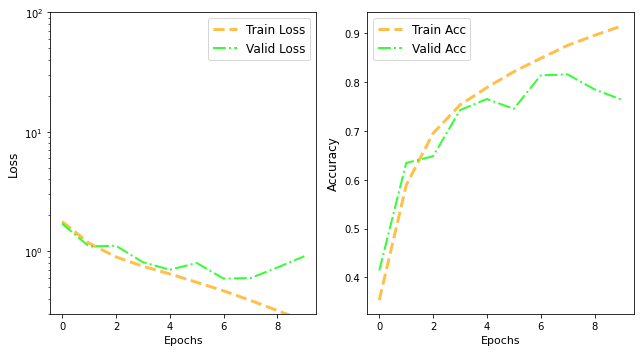

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/Task2_accuracy_adam_vgg.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = vgg_model.evaluate(test_images, test_labels, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  0.909264326095581
VGG accuracy:  0.76419997215271


## With regularization VGG

In [ ]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# print(train_labels.shape,test_labels.shape)


train_images = train_images.astype(np.float32) / 255.0
train_labels = train_labels.astype(np.int32)


test_images = test_images.astype(np.float32) / 255.0
test_labels = test_labels.astype(np.int32)

In [ ]:
# VGG-16 

vgg_model = tf.keras.Sequential([ tf.keras.layers.Conv2D(filters= 64, kernel_size= 3 , input_shape=(32,32,3),padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.3),
                             
                              tf.keras.layers.Conv2D(filters= 64, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 128, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 256 , kernel_size= 3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 256, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512 , kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size=3, padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.4),
                             
                              tf.keras.layers.Conv2D(filters= 512, kernel_size= 3,padding='same',activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                             
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                              tf.keras.layers.Dropout(0.5),
                             
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(512, activation='relu'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(0.5),
                              
                              tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
learning_rate = 0.005
adam = optimizers.Adam(lr=learning_rate)
vgg_model.compile(optimizer=adam, loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])
history = vgg_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 2.1661 - accuracy: 0.2297 - val_loss: 1.7392 - val_accuracy: 0.3319
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5881 - accuracy: 0.4057 - val_loss: 1.7816 - val_accuracy: 0.3889
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2816 - accuracy: 0.5505 - val_loss: 1.1732 - val_accuracy: 0.6067
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0999 - accuracy: 0.6229 - val_loss: 1.0660 - val_accuracy: 0.6529
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9801 - accuracy: 0.6717 - val_loss: 0.9509 - val_accuracy: 0.6828
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8845 - accuracy: 0.7058 - val_loss: 0.7470 - val_accuracy: 0.7518
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8185 - accuracy: 0.7344 - val_loss: 0.7984 -

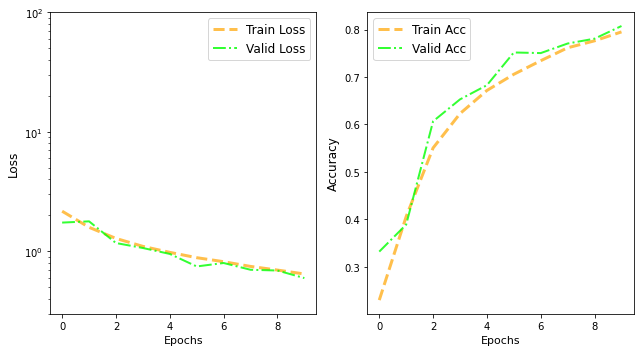

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/Task2_accuracy_adam_vgg.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = vgg_model.evaluate(test_images, test_labels, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  0.597205400466919
VGG accuracy:  0.8076000213623047


## Without regularization ResNet

In [ ]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# print(train_labels.shape,test_labels.shape)


train_images = train_images.astype(np.float32) / 255.0
train_labels = train_labels.astype(np.int32)


test_images = test_images.astype(np.float32) / 255.0
test_labels = test_labels.astype(np.int32)

In [ ]:
### One hot encoding for labels 

train_lab_categorical = tf.keras.utils.to_categorical(
    train_labels, num_classes=10, dtype='uint8')

test_lab_categorical = tf.keras.utils.to_categorical(
    test_labels, num_classes=10, dtype='uint8')

In [ ]:
# Train -test split 

from sklearn.model_selection import train_test_split 
train_img, valid_img, train_label, valid_label = train_test_split(train_images, train_lab_categorical, test_size=0.20, 
                                                            stratify=train_lab_categorical,random_state=40,shuffle = True)

print ("train data shape after the split: ", train_img.shape)
print ('validation data shape: ', valid_img.shape)
print ("validation labels shape: ", valid_label.shape)

train data shape after the split:  (40000, 32, 32, 3)
validation data shape:  (10000, 32, 32, 3)
validation labels shape:  (10000, 10)


In [ ]:
# Reference from https://github.com/suvoooo/Learn-TensorFlow/blob/master/resnet/Implement_Resnet_TensorFlow.ipynb

# ResNet-50

def resnet_identity(x, filters): 

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
  x = BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x


In [ ]:
def resnet_conv(x, s, filters):
  '''
  here the input size changes, when it goes via conv blocks
  so the skip connection uses a projection (conv layer) matrix
  ''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid')(x) 
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid')(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid')(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
def resnet50():

  input_img = Input(shape=(train_img.shape[1], train_img.shape[2], train_img.shape[3])) # cifar 10 images size
  x = ZeroPadding2D(padding=(3, 3))(input_img)

  # 1st stage
  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  x = resnet_conv(x, s=1, filters=(64, 256))
  x = resnet_identity(x, filters=(64, 256))
  x = resnet_identity(x, filters=(64, 256))

  # 3rd stage

  x = resnet_conv(x, s=2, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))

  # 4th stage

  x = resnet_conv(x, s=2, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))

  # 5th stage

  x = resnet_conv(x, s=2, filters=(512, 2048))
  x = resnet_identity(x, filters=(512, 2048))
  x = resnet_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(10, activation='softmax', kernel_initializer='he_normal')(x)

  # define the model 

  model = Model(inputs=input_img, outputs=x, name='Resnet50')

  return model

In [ ]:
resnet50_model = resnet50()
# resnet50_model.summary()

In [ ]:
batch_size = 64 
learning_rate = 0.003
adam = optimizers.Adam(lr=learning_rate)
resnet50_model.compile(optimizer=adam, loss= 'categorical_crossentropy',metrics = ['accuracy'])

history = resnet50_model.fit(train_img,train_label, epochs=120, steps_per_epoch=train_img.shape[0]/batch_size, 
                                  validation_steps=valid_img.shape[0]/batch_size, validation_data=(valid_img,valid_label))

Epoch 1/120
625/625 [==============================] - 26s 42ms/step - loss: 2.5906 - accuracy: 0.2505 - val_loss: 2.0677 - val_accuracy: 0.3205
Epoch 2/120
625/625 [==============================] - 26s 42ms/step - loss: 1.9608 - accuracy: 0.3872 - val_loss: 1.7553 - val_accuracy: 0.4049
Epoch 3/120
625/625 [==============================] - 26s 42ms/step - loss: 1.7306 - accuracy: 0.4325 - val_loss: 3.1700 - val_accuracy: 0.3833
Epoch 4/120
625/625 [==============================] - 26s 41ms/step - loss: 1.5453 - accuracy: 0.4922 - val_loss: 1.4971 - val_accuracy: 0.4910
Epoch 5/120
625/625 [==============================] - 26s 41ms/step - loss: 1.4115 - accuracy: 0.5372 - val_loss: 3.8696 - val_accuracy: 0.1249
Epoch 6/120
625/625 [==============================] - 26s 41ms/step - loss: 1.2544 - accuracy: 0.5757 - val_loss: 1.8612 - val_accuracy: 0.4968
Epoch 7/120
625/625 [==============================] - 26s 41ms/step - loss: 1.1030 - accuracy: 0.6225 - val_loss: 1.3033 - val_ac

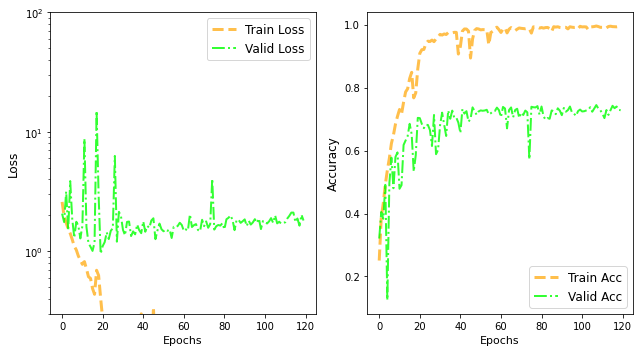

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/Task2_accuracy_adam_res.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = resnet50_model.evaluate(test_images, test_lab_categorical, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  1.85733163356781
VGG accuracy:  0.723800003528595


## With regularization ResNet

In [ ]:
(train_images, train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# print(train_labels.shape,test_labels.shape)


train_images = train_images.astype(np.float32) / 255.0
train_labels = train_labels.astype(np.int32)


test_images = test_images.astype(np.float32) / 255.0
test_labels = test_labels.astype(np.int32)

In [ ]:
### One hot encoding for labels 

train_lab_categorical = tf.keras.utils.to_categorical(
    train_labels, num_classes=10, dtype='uint8')

test_lab_categorical = tf.keras.utils.to_categorical(
    test_labels, num_classes=10, dtype='uint8')

In [ ]:
# Train -test split 

from sklearn.model_selection import train_test_split 
train_img, valid_img, train_label, valid_label = train_test_split(train_images, train_lab_categorical, test_size=0.20, 
                                                            stratify=train_lab_categorical,random_state=40,shuffle = True)

print ("train data shape after the split: ", train_img.shape)
print ('validation data shape: ', valid_img.shape)
print ("validation labels shape: ", valid_label.shape)

train data shape after the split:  (40000, 32, 32, 3)
validation data shape:  (10000, 32, 32, 3)
validation labels shape:  (10000, 10)


In [ ]:
#  Including Data Augmentation 
batch_size = 64 

train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2, 
                                                                width_shift_range=0.1, 
                                                                height_shift_range = 0.1, 
                                                                horizontal_flip=True)
 
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_set_conv = train_DataGen.flow(train_img, train_label, batch_size=batch_size) 
valid_set_conv = valid_datagen.flow(valid_img, valid_label, batch_size=batch_size) 

In [ ]:
# Reference from https://github.com/suvoooo/Learn-TensorFlow/blob/master/resnet/Implement_Resnet_TensorFlow.ipynb

# ResNet-50

def resnet_identity(x, filters): 

  x_skip = x # this will be used for addition with the residual block 
  f1, f2 = filters

  #first block 
  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #second block # bottleneck (but size kept same with padding)
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # third block activation used after adding the input
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  # x = Activation(activations.relu)(x)

  # add the input 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x


In [ ]:
def resnet_conv(x, s, filters):
  '''
  here the input size changes, when it goes via conv blocks
  so the skip connection uses a projection (conv layer) matrix
  ''' 
  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x) 
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut 
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
def resnet50():

  input_img = Input(shape=(train_img.shape[1], train_img.shape[2], train_img.shape[3])) # cifar 10 images size
  x = ZeroPadding2D(padding=(3, 3))(input_img)

  # 1st stage
  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)

  #2nd stage 
  x = resnet_conv(x, s=1, filters=(64, 256))
  x = resnet_identity(x, filters=(64, 256))
  x = resnet_identity(x, filters=(64, 256))

  # 3rd stage

  x = resnet_conv(x, s=2, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))
  x = resnet_identity(x, filters=(128, 512))

  # 4th stage

  x = resnet_conv(x, s=2, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))
  x = resnet_identity(x, filters=(256, 1024))

  # 5th stage

  x = resnet_conv(x, s=2, filters=(512, 2048))
  x = resnet_identity(x, filters=(512, 2048))
  x = resnet_identity(x, filters=(512, 2048))

  # ends with average pooling and dense connection

  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)
  x = Dense(10, activation='softmax', kernel_initializer='he_normal')(x)

  # define the model 

  model = Model(inputs=input_img, outputs=x, name='Resnet50')

  return model

In [ ]:
resnet50_model = resnet50()
# resnet50_model.summary()

In [ ]:
learning_rate = 0.003
adam = optimizers.Adam(lr=learning_rate)
resnet50_model.compile(optimizer=adam, loss= 'categorical_crossentropy',metrics = ['accuracy'])

history = resnet50_model.fit(train_set_conv, epochs=120, steps_per_epoch=train_img.shape[0]/batch_size, 
                                  validation_steps=valid_img.shape[0]/batch_size, validation_data=valid_set_conv)

Epoch 1/120
625/625 [==============================] - 33s 53ms/step - loss: 14.3497 - accuracy: 0.2050 - val_loss: 15.2767 - val_accuracy: 0.0971
Epoch 2/120
625/625 [==============================] - 32s 51ms/step - loss: 6.6409 - accuracy: 0.2920 - val_loss: 4256.6323 - val_accuracy: 0.1000
Epoch 3/120
625/625 [==============================] - 31s 50ms/step - loss: 5.9003 - accuracy: 0.2482 - val_loss: 4.2239 - val_accuracy: 0.2140
Epoch 4/120
625/625 [==============================] - 31s 50ms/step - loss: 3.9285 - accuracy: 0.3358 - val_loss: 3.0308 - val_accuracy: 0.3320
Epoch 5/120
625/625 [==============================] - 31s 49ms/step - loss: 3.9994 - accuracy: 0.3553 - val_loss: 3.5211 - val_accuracy: 0.2403
Epoch 6/120
625/625 [==============================] - 30s 48ms/step - loss: 3.2648 - accuracy: 0.3483 - val_loss: 10.7657 - val_accuracy: 0.1232
Epoch 7/120
625/625 [==============================] - 30s 48ms/step - loss: 2.9450 - accuracy: 0.3264 - val_loss: 4.2225 - 

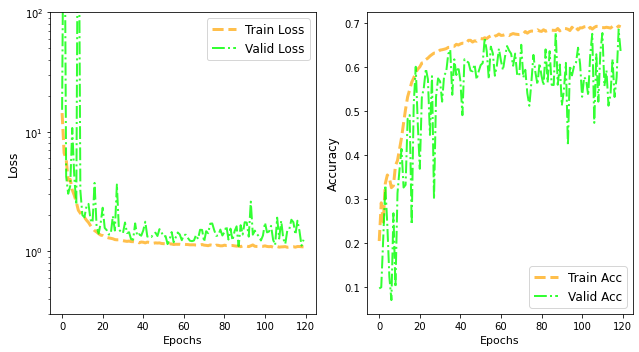

In [ ]:
# Plot train and validation curves
loss = history.history['loss']
v_loss = history.history['val_loss']

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']

epochs = range(len(loss))

fig = plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.yscale('log')
plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
plt.ylim(0.3, 100)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc') 
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/IDL course OvGU/Task2_accuracy_adam_res.png', dpi=250)
plt.show()

In [ ]:
# Checking the performance on the test data 
test_result = resnet50_model.evaluate(test_images, test_lab_categorical, verbose=0)

print ("VGG loss: ", test_result[0])
print ("VGG accuracy: ", test_result[1])

VGG loss:  1.2318211793899536
VGG accuracy:  0.6450999975204468


# Task 3 Transfer Learning

## 3.1 Same distribution

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))
print("Shape of training examples:", x_train.shape)
print("Shape of test examples:", x_test.shape)

Number of original training examples: 60000
Number of original test examples: 10000
Shape of training examples: (60000, 28, 28)
Shape of test examples: (10000, 28, 28)


Text(0.5, 0, 'Digit')

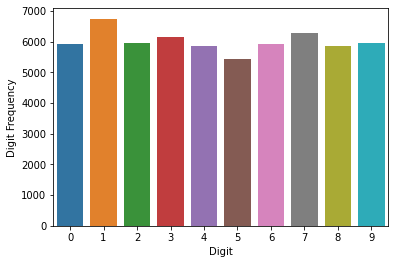

In [34]:
sns.countplot(y_train)
plt.ylabel('Digit Frequency')
plt.xlabel('Digit')

In [35]:
# Reference from https://www.kaggle.com/manoharswamynathan/transfer-learning-with-keras-tf

X_train_lt7 = x_train[y_train < 7]
y_train_lt7 = y_train[y_train < 7]
X_test_lt7 = x_test[y_test < 7]
y_test_lt7 = y_test[y_test < 7]

X_train_gte7 = x_train[y_train >= 7]
y_train_gte7 = y_train[y_train >= 7] - 7         # make classes start at 0 for using to_categorical
X_test_gte7 = x_test[y_test >= 7]           
y_test_gte7 = y_test[y_test >= 7] - 7

Text(0.5, 0, 'Digit')

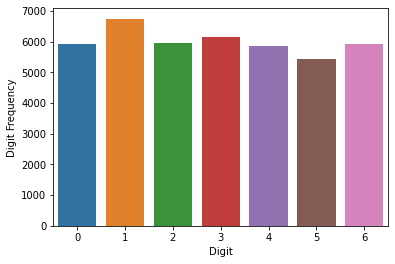

In [10]:
sns.countplot(y_train_lt7)
plt.ylabel('Digit Frequency')
plt.xlabel('Digit')

Text(0.5, 0, 'Digit')

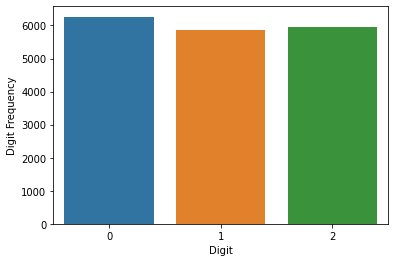

In [11]:
sns.countplot(y_train_gte7)
plt.ylabel('Digit Frequency')
plt.xlabel('Digit')

### Training Target domain set on already trained model

In [36]:
batch_size = 128
# nb_classes = 7
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [37]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [38]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

# train model for 7-digit classification [0..6]
train_model(model, (X_train_lt7, y_train_lt7), (X_test_lt7, y_test_lt7), 7)

X_train shape: (41935, 28, 28, 1)
41935 train samples
6989 test samples
Epoch 1/5
328/328 [==============================] - 1s 4ms/step - loss: 0.6505 - accuracy: 0.7838 - val_loss: 0.2472 - val_accuracy: 0.9280
Epoch 2/5
328/328 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8934 - val_loss: 0.1939 - val_accuracy: 0.9426
Epoch 3/5
328/328 [==============================] - 1s 3ms/step - loss: 0.2952 - accuracy: 0.9110 - val_loss: 0.1607 - val_accuracy: 0.9491
Epoch 4/5
328/328 [==============================] - 1s 3ms/step - loss: 0.2691 - accuracy: 0.9166 - val_loss: 0.1519 - val_accuracy: 0.9542
Epoch 5/5
328/328 [==============================] - 1s 3ms/step - loss: 0.2509 - accuracy: 0.9241 - val_loss: 0.1385 - val_accuracy: 0.9551
Test score: 0.13853247463703156
Test accuracy: 0.955072283744812


In [40]:
# Removing last layer from already trained model and adding new layer for classification of three numbers

new_model = tf.keras.Sequential()
for layer in model.layers[:-2]: # iterate until second layer and add that to new model
    new_model.add(layer)
new_model.add(Dense(3, activation='softmax'))

train_model(new_model, (X_train_gte7, y_train_gte7), (X_test_gte7, y_test_gte7), 3)

X_train shape: (18065, 28, 28, 1)
18065 train samples
3011 test samples
Epoch 1/5
142/142 [==============================] - 1s 4ms/step - loss: 0.4033 - accuracy: 0.8410 - val_loss: 0.1641 - val_accuracy: 0.9422
Epoch 2/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1946 - accuracy: 0.9363 - val_loss: 0.1262 - val_accuracy: 0.9562
Epoch 3/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1630 - accuracy: 0.9452 - val_loss: 0.1116 - val_accuracy: 0.9618
Epoch 4/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9545 - val_loss: 0.1049 - val_accuracy: 0.9645
Epoch 5/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1304 - accuracy: 0.9576 - val_loss: 0.1004 - val_accuracy: 0.9641
Test score: 0.10039573907852173
Test accuracy: 0.9641315340995789


### Training target domain on freshly initialized model

In [41]:
batch_size = 128
nb_classes = 3
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [42]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [46]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

# train model for 7-digit classification [7..9]
train_model(model, (X_train_gte7, y_train_gte7), (X_test_gte7, y_test_gte7), nb_classes)

X_train shape: (18065, 28, 28, 1)
18065 train samples
3011 test samples
Epoch 1/5
142/142 [==============================] - 1s 4ms/step - loss: 0.3721 - accuracy: 0.8655 - val_loss: 0.1856 - val_accuracy: 0.9406
Epoch 2/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9360 - val_loss: 0.1302 - val_accuracy: 0.9532
Epoch 3/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1452 - accuracy: 0.9525 - val_loss: 0.1252 - val_accuracy: 0.9565
Epoch 4/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9553 - val_loss: 0.1058 - val_accuracy: 0.9628
Epoch 5/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9632 - val_loss: 0.0954 - val_accuracy: 0.9698
Test score: 0.09536872804164886
Test accuracy: 0.9697774648666382


## 3.2 Different Distribution

In [51]:
(x_train_m, y_train_m), (x_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()

print("Shape of mnist training examples:", x_train_m.shape)
print("Shape of mnist test examples:", x_test_m.shape)

(x_train_f, y_train_f), (x_test_f, y_test_f) = tf.keras.datasets.fashion_mnist.load_data()

print("Shape of fmnist training examples:", x_train_f.shape)
print("Shape of fmnist test examples:", x_test_f.shape)

Shape of mnist training examples: (60000, 28, 28)
Shape of mnist test examples: (10000, 28, 28)
Shape of fmnist training examples: (60000, 28, 28)
Shape of fmnist test examples: (10000, 28, 28)


### MNIST- Source FMNIST- Target

####  Train a model on the MNIST and use the pre-trained model as initialization for a model trained on FMNIST

In [52]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [53]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [54]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_m, y_train_m), (x_test_m, y_test_m), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9050 - accuracy: 0.7088 - val_loss: 0.3841 - val_accuracy: 0.8848
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5680 - accuracy: 0.8262 - val_loss: 0.3005 - val_accuracy: 0.9096
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5007 - accuracy: 0.8482 - val_loss: 0.2817 - val_accuracy: 0.9138
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.8586 - val_loss: 0.2567 - val_accuracy: 0.9231
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4432 - accuracy: 0.8652 - val_loss: 0.2493 - val_accuracy: 0.9238
Test score: 0.24925293028354645
Test accuracy: 0.923799991607666


In [55]:
# Transfer model of mnist to fashion mnist
new_model = tf.keras.Sequential()
for layer in model.layers[:-2]: # iterate until second layer and add that to new model
    new_model.add(layer)
new_model.add(Dense(10, activation='softmax'))

train_model(new_model, (x_train_f, y_train_f), (x_test_f, y_test_f), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9845 - accuracy: 0.6439 - val_loss: 0.6288 - val_accuracy: 0.7706
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7211 - accuracy: 0.7410 - val_loss: 0.5718 - val_accuracy: 0.7917
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6687 - accuracy: 0.7593 - val_loss: 0.5469 - val_accuracy: 0.8009
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6312 - accuracy: 0.7712 - val_loss: 0.5235 - val_accuracy: 0.8075
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6127 - accuracy: 0.7778 - val_loss: 0.5183 - val_accuracy: 0.8093
Test score: 0.5183371305465698
Test accuracy: 0.8093000054359436


 #### Model trained on FMNIST from scratch

In [56]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [57]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [58]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_f, y_train_f), (x_test_f, y_test_f), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0288 - accuracy: 0.6239 - val_loss: 0.6551 - val_accuracy: 0.7675
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7341 - accuracy: 0.7365 - val_loss: 0.5902 - val_accuracy: 0.7834
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6829 - accuracy: 0.7528 - val_loss: 0.5573 - val_accuracy: 0.7929
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6535 - accuracy: 0.7612 - val_loss: 0.5440 - val_accuracy: 0.7974
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6370 - accuracy: 0.7699 - val_loss: 0.5387 - val_accuracy: 0.8009
Test score: 0.5387380123138428
Test accuracy: 0.8008999824523926


### FMNIST- Source MNIST- Target

####  Train a model on the fMNIST and use the pre-trained model as initialization for a model trained on MNIST

In [59]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [60]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [61]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_f, y_train_f), (x_test_f, y_test_f), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9896 - accuracy: 0.6406 - val_loss: 0.6416 - val_accuracy: 0.7649
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7192 - accuracy: 0.7405 - val_loss: 0.5727 - val_accuracy: 0.7869
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6672 - accuracy: 0.7603 - val_loss: 0.5580 - val_accuracy: 0.7920
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6376 - accuracy: 0.7698 - val_loss: 0.5317 - val_accuracy: 0.8073
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6169 - accuracy: 0.7778 - val_loss: 0.5303 - val_accuracy: 0.8023
Test score: 0.5303382277488708
Test accuracy: 0.802299976348877


In [62]:
# Transfer model of fmnist to mnist
new_model = tf.keras.Sequential()
for layer in model.layers[:-2]: # iterate until second layer and add that to new model
    new_model.add(layer)
new_model.add(Dense(10, activation='softmax'))

train_model(new_model, (x_train_m, y_train_m), (x_test_m, y_test_m), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9834 - accuracy: 0.6767 - val_loss: 0.4031 - val_accuracy: 0.8832
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5904 - accuracy: 0.8192 - val_loss: 0.3196 - val_accuracy: 0.9035
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5090 - accuracy: 0.8458 - val_loss: 0.2849 - val_accuracy: 0.9136
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4686 - accuracy: 0.8569 - val_loss: 0.2591 - val_accuracy: 0.9219
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4430 - accuracy: 0.8650 - val_loss: 0.2549 - val_accuracy: 0.9222
Test score: 0.25490227341651917
Test accuracy: 0.9222000241279602


 #### Model trained on MNIST from scratch

In [66]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [67]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [68]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_m, y_train_m), (x_test_m, y_test_m), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9287 - accuracy: 0.6993 - val_loss: 0.3852 - val_accuracy: 0.8836
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5760 - accuracy: 0.8236 - val_loss: 0.3210 - val_accuracy: 0.9030
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5164 - accuracy: 0.8427 - val_loss: 0.2812 - val_accuracy: 0.9142
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4818 - accuracy: 0.8538 - val_loss: 0.2619 - val_accuracy: 0.9185
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4503 - accuracy: 0.8641 - val_loss: 0.2520 - val_accuracy: 0.9236
Test score: 0.2520235478878021
Test accuracy: 0.9236000180244446


## 3.3 Compare diffferent ways to do the transfer learning

### Freezing all pre-trained layers (i.e. set trainable to False)

In [135]:
(x_train_m, y_train_m), (x_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()

print("Shape of mnist training examples:", x_train_m.shape)
print("Shape of mnist test examples:", x_test_m.shape)

(x_train_f, y_train_f), (x_test_f, y_test_f) = tf.keras.datasets.fashion_mnist.load_data()

print("Shape of fmnist training examples:", x_train_f.shape)
print("Shape of fmnist test examples:", x_test_f.shape)

Shape of mnist training examples: (60000, 28, 28)
Shape of mnist test examples: (10000, 28, 28)
Shape of fmnist training examples: (60000, 28, 28)
Shape of fmnist test examples: (10000, 28, 28)


In [136]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [137]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [138]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_f, y_train_f), (x_test_f, y_test_f), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9939 - accuracy: 0.6391 - val_loss: 0.6433 - val_accuracy: 0.7715
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7103 - accuracy: 0.7454 - val_loss: 0.5691 - val_accuracy: 0.7889
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6637 - accuracy: 0.7619 - val_loss: 0.5395 - val_accuracy: 0.8032
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6275 - accuracy: 0.7720 - val_loss: 0.5269 - val_accuracy: 0.8032
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6085 - accuracy: 0.7813 - val_loss: 0.5243 - val_accuracy: 0.8066
Test score: 0.5242717862129211
Test accuracy: 0.8065999746322632


In [139]:
# Transfer model of mnist to fashion mnist
new_model = tf.keras.Sequential()
for layer in model.layers[:-1]: # iterate until second layer and add that to new model
    layer.trainable = False
    new_model.add(layer)

train_model(new_model, (x_train_m, y_train_m), (x_test_m, y_test_m), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 5.7463 - accuracy: 0.1005 - val_loss: 5.6038 - val_accuracy: 0.1106
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 5.7488 - accuracy: 0.1001 - val_loss: 5.6038 - val_accuracy: 0.1106
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 5.7883 - accuracy: 0.1008 - val_loss: 5.6038 - val_accuracy: 0.1106
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 5.7756 - accuracy: 0.1028 - val_loss: 5.6038 - val_accuracy: 0.1106
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 5.7286 - accuracy: 0.1015 - val_loss: 5.6038 - val_accuracy: 0.1106
Test score: 5.603766441345215
Test accuracy: 0.11060000211000443


In [140]:
new_model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_102 (Activation)  (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_103 (Activation)  (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 32)              

### Freezing only some bottom layers

In [141]:
(x_train_m, y_train_m), (x_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()

print("Shape of mnist training examples:", x_train_m.shape)
print("Shape of mnist test examples:", x_test_m.shape)

(x_train_f, y_train_f), (x_test_f, y_test_f) = tf.keras.datasets.fashion_mnist.load_data()

print("Shape of fmnist training examples:", x_train_f.shape)
print("Shape of fmnist test examples:", x_test_f.shape)

Shape of mnist training examples: (60000, 28, 28)
Shape of mnist test examples: (10000, 28, 28)
Shape of fmnist training examples: (60000, 28, 28)
Shape of fmnist test examples: (10000, 28, 28)


In [142]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [143]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [144]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_f, y_train_f), (x_test_f, y_test_f), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0017 - accuracy: 0.6351 - val_loss: 0.6419 - val_accuracy: 0.7637
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7288 - accuracy: 0.7368 - val_loss: 0.5744 - val_accuracy: 0.7949
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6653 - accuracy: 0.7592 - val_loss: 0.5440 - val_accuracy: 0.8035
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6313 - accuracy: 0.7719 - val_loss: 0.5272 - val_accuracy: 0.8065
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6108 - accuracy: 0.7787 - val_loss: 0.5202 - val_accuracy: 0.8066
Test score: 0.5201557874679565
Test accuracy: 0.8065999746322632


In [111]:
# model.summary()  

In [145]:
# Transfer model of mnist to fashion mnist
new_model = tf.keras.Sequential()

for layer in model.layers[:-1]: # iterate until second layer and add that to new model
  if 'dense' in layer.name:
    layer.trainable = False
    new_model.add(layer)
  else:
    new_model.add(layer)

# new_model.add(Dense(10, activation='softmax'))

train_model(new_model, (x_train_m, y_train_m), (x_test_m, y_test_m), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 3.2344 - accuracy: 0.0728 - val_loss: 2.2985 - val_accuracy: 0.0282
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.6091 - accuracy: 0.0179 - val_loss: 2.0605 - val_accuracy: 0.0104
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 2.1437 - accuracy: 0.0100 - val_loss: 1.6446 - val_accuracy: 0.0059
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 1.9719 - accuracy: 0.0077 - val_loss: 1.6223 - val_accuracy: 0.0047
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 1.8572 - accuracy: 0.0063 - val_loss: 1.8035 - val_accuracy: 0.0038
Test score: 1.8035081624984741
Test accuracy: 0.003800000064074993


In [146]:
new_model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_106 (Activation)  (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_107 (Activation)  (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 32)              

### Replacing (or reinitializing) multiple top layers

In [147]:
(x_train_m, y_train_m), (x_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()

print("Shape of mnist training examples:", x_train_m.shape)
print("Shape of mnist test examples:", x_test_m.shape)

(x_train_f, y_train_f), (x_test_f, y_test_f) = tf.keras.datasets.fashion_mnist.load_data()

print("Shape of fmnist training examples:", x_train_f.shape)
print("Shape of fmnist test examples:", x_test_f.shape)

Shape of mnist training examples: (60000, 28, 28)
Shape of mnist test examples: (10000, 28, 28)
Shape of fmnist training examples: (60000, 28, 28)
Shape of fmnist test examples: (10000, 28, 28)


In [148]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [149]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [150]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_f, y_train_f), (x_test_f, y_test_f), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0369 - accuracy: 0.6251 - val_loss: 0.6541 - val_accuracy: 0.7617
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7412 - accuracy: 0.7354 - val_loss: 0.5859 - val_accuracy: 0.7884
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6826 - accuracy: 0.7544 - val_loss: 0.5624 - val_accuracy: 0.7955
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6491 - accuracy: 0.7654 - val_loss: 0.5381 - val_accuracy: 0.8021
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6306 - accuracy: 0.7717 - val_loss: 0.5389 - val_accuracy: 0.8010
Test score: 0.5388669967651367
Test accuracy: 0.8009999990463257


In [151]:
model.summary()  

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_110 (Activation)  (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_111 (Activation)  (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 32)              

In [152]:
# Transfer model of mnist to fashion mnist
new_model = tf.keras.Sequential()
for i, layer in enumerate(model.layers):
    if 'conv2d' in layer.name:
        print(layer.name)
        weight_initializer = model.layers[i].kernel_initializer
        bias_initializer = model.layers[i].bias_initializer

        old_weights, old_biases = model.layers[i].get_weights()

        model.layers[i].set_weights([weight_initializer(shape=old_weights.shape),bias_initializer(shape=len(old_biases))])
        new_model.add(model.layers[i])
    else:
        new_model.add(model.layers[i])

# new_model.add(Dense(10, activation='softmax'))

train_model(new_model, (x_train_m, y_train_m), (x_test_m, y_test_m), nb_classes)

conv2d_56
conv2d_57
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8943 - accuracy: 0.7143 - val_loss: 0.3646 - val_accuracy: 0.8984
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5501 - accuracy: 0.8317 - val_loss: 0.3008 - val_accuracy: 0.9107
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4869 - accuracy: 0.8518 - val_loss: 0.2596 - val_accuracy: 0.9206
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4527 - accuracy: 0.8626 - val_loss: 0.2401 - val_accuracy: 0.9293
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4295 - accuracy: 0.8694 - val_loss: 0.2339 - val_accuracy: 0.9278
Test score: 0.23390454053878784
Test accuracy: 0.9277999997138977


In [153]:
new_model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_110 (Activation)  (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_111 (Activation)  (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 32)              

### Replacing the source classification layer by multiple new ones for the target domain

In [160]:
(x_train_m, y_train_m), (x_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()

print("Shape of mnist training examples:", x_train_m.shape)
print("Shape of mnist test examples:", x_test_m.shape)

(x_train_f, y_train_f), (x_test_f, y_test_f) = tf.keras.datasets.fashion_mnist.load_data()

print("Shape of fmnist training examples:", x_train_f.shape)
print("Shape of fmnist test examples:", x_test_f.shape)

Shape of mnist training examples: (60000, 28, 28)
Shape of mnist test examples: (10000, 28, 28)
Shape of fmnist training examples: (60000, 28, 28)
Shape of fmnist test examples: (10000, 28, 28)


In [161]:
batch_size = 128
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28

# number of convolutional filters to use
nb_filters = 32

# size of pooling area for max pooling
pool_size = 2

# convolution kernel size
kernel_size = 3

input_shape = (img_rows, img_cols, 1)

In [162]:
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape(-1, 28,28,1)
    X_test = test[0].reshape(-1, 28,28,1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = tf.keras.utils.to_categorical(train[1], nb_classes,dtype='uint8')
    Y_test = tf.keras.utils.to_categorical(test[1], nb_classes,dtype='uint8')

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

    model.fit(X_train, Y_train,batch_size=batch_size, epochs =nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [163]:
feature_layers = [
    Conv2D(nb_filters, kernel_size, kernel_size,padding ='valid',input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = tf.keras.Sequential(feature_layers + classification_layers)

train_model(model, (x_train_f, y_train_f), (x_test_f, y_test_f), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0173 - accuracy: 0.6287 - val_loss: 0.6503 - val_accuracy: 0.7577
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7397 - accuracy: 0.7330 - val_loss: 0.5910 - val_accuracy: 0.7842
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6865 - accuracy: 0.7528 - val_loss: 0.5685 - val_accuracy: 0.7890
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6539 - accuracy: 0.7650 - val_loss: 0.5472 - val_accuracy: 0.7976
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6354 - accuracy: 0.7715 - val_loss: 0.5371 - val_accuracy: 0.8034
Test score: 0.5370766520500183
Test accuracy: 0.8033999800682068


In [164]:
# Transfer model of mnist to fashion mnist
new_model = tf.keras.Sequential()
for layer in model.layers[:-2]: # iterate until second layer and add that to new model
    new_model.add(layer)

# replacing source classification layer with multiple dense layers  

# new_model.add(Dense(10, activation='softmax')) results better in 64,10,10 than 10,10,10 dense layers
new_model.add(Dense(64, activation='softmax'))
new_model.add(Dense(10, activation='softmax'))
new_model.add(Dense(10, activation='softmax'))

train_model(new_model, (x_train_m, y_train_m), (x_test_m, y_test_m), nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.9290 - accuracy: 0.4467 - val_loss: 1.4271 - val_accuracy: 0.5592
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.3180 - accuracy: 0.5450 - val_loss: 1.1113 - val_accuracy: 0.5839
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 1.1331 - accuracy: 0.5784 - val_loss: 0.9744 - val_accuracy: 0.6321
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0046 - accuracy: 0.6459 - val_loss: 0.7698 - val_accuracy: 0.7590
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8491 - accuracy: 0.7348 - val_loss: 0.6172 - val_accuracy: 0.8437
Test score: 0.6172254085540771
Test accuracy: 0.8436999917030334


In [165]:
new_model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 9, 9, 32)          320       
_________________________________________________________________
activation_118 (Activation)  (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_119 (Activation)  (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 32)              